In [22]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from sklearn.utils import class_weight

In [23]:
data = pd.read_csv('H1_peaks.csv') # read csv file of trades
data.tail()

,price0,price1,price2,price3,price4,price5,price6,price7,obv0,obv1,...,stS7,natr0,natr1,natr2,natr3,natr4,natr5,natr6,natr7,label
2255,10.25717,10.25086,10.25110,10.24598,10.24078,10.23862,10.22554,10.23488,1570.0,1200.0,...,10.260027,0.123757,0.122885,0.118523,0.116928,0.114722,0.114215,0.116638,0.119176,0
2256,144.34700,144.36500,144.58600,144.52600,144.48800,144.42800,144.41600,144.68700,21404.0,22982.0,...,25.609849,0.162136,0.158235,0.162128,0.159241,0.156924,0.152567,0.147790,0.149986,1
2257,144.87000,144.68000,144.72300,144.74000,144.62400,144.65400,144.40800,144.46000,23837.0,22741.0,...,7.598612,0.152901,0.155780,0.152473,0.148770,0.146665,0.145387,0.149986,0.148216,0
2258,6.60522,6.60462,6.60288,6.60499,6.60372,6.59076,6.60132,6.59915,-1915.0,-4826.0,...,37.509641,0.076956,0.075416,0.074011,0.073067,0.073848,0.083418,0.089513,0.091664,1
2259,6.61087,6.60580,6.59197,6.58334,6.58676,6.57509,6.57439,6.57936,-15367.0,-28228.0,...,23.248781,0.102470,0.104037,0.110806,0.115688,0.116192,0.126966,0.124502,0.124670,0


In [24]:
for col in data:
    data[col] = pd.to_numeric(data[col])

In [25]:
data = data.dropna()

In [26]:
X = data.loc[:, :'natr7']
y = data['label']

sc = MinMaxScaler()
X = sc.fit_transform(X)

# save sc so we can use it for predictions
scaler_filename = "H1_SELL_scaler.save"
joblib.dump(sc, scaler_filename)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X.shape)

(2260, 64)


In [27]:
# Number of neurons in the first layer = number of columns in dataset
# Activation function = ReLU
# 5 Hidden layers for a total of 6 layers in the network
# Last layer activation function = Sigmoid

model = Sequential()

# input layer
model.add(Dense(100, activation='relu', input_dim = 64))
          
# second layer
model.add(Dense(60, activation='relu'))
          
# third layer
model.add(Dense(60, activation='relu'))
          
# fourth layer
model.add(Dense(100, activation='relu'))

# fith layer
model.add(Dense(60, activation='relu'))
          
# output layer
model.add(Dense(1, activation='sigmoid'))

# compile the model using rmsprop opt and mse loss
model.compile(optimizer = 'adam',     
              loss = 'mse',
              metrics = ['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, y_train, 
                    validation_split = 0.33, 
                    epochs = 50,
                    batch_size = 20)

# Evaluate the model's performance
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

Train on 1211 samples, validate on 597 samples
Epoch 1/50
1211/1211 [==============================] - 1s 868us/step - loss: 0.1234 - acc: 0.8555 - val_loss: 0.0698 - val_acc: 0.8928
Epoch 2/50
1211/1211 [==============================] - 0s 205us/step - loss: 0.0666 - acc: 0.9116 - val_loss: 0.0576 - val_acc: 0.9246
Epoch 3/50
1211/1211 [==============================] - 0s 175us/step - loss: 0.0636 - acc: 0.9182 - val_loss: 0.0575 - val_acc: 0.9296
Epoch 4/50
1211/1211 [==============================] - 0s 166us/step - loss: 0.0627 - acc: 0.9158 - val_loss: 0.0530 - val_acc: 0.9330
Epoch 5/50
1211/1211 [==============================] - 0s 171us/step - loss: 0.0542 - acc: 0.9290 - val_loss: 0.0549 - val_acc: 0.9146
Epoch 6/50
1211/1211 [==============================] - 0s 169us/step - loss: 0.0587 - acc: 0.9133 - val_loss: 0.0486 - val_acc: 0.9347
Epoch 7/50
1211/1211 [==============================] - 0s 170us/step - loss: 0.0523 - acc: 0.9356 - val_loss: 0.0430 - val_acc: 0.9414
E

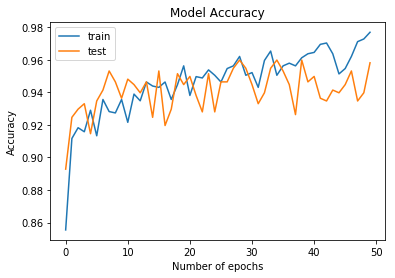

In [28]:
# The history of our accuracy during training.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

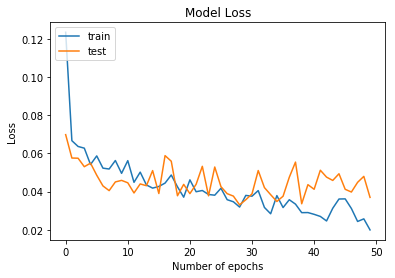

In [29]:
# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# save the model for later use
from keras.models import load_model
model.save('H1_SELL_OPT')  # creates a HDF5 file
del model  # deletes the existing model

# load model to make sure that it was correctly saved
model = load_model('H1_SELL_OPT')

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test set accuracy:', test_acc)

452/452 [==============================] - 0s 289us/step
Test set accuracy: 0.9402654867256637
